In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces

from IPython.display import display, Image
%matplotlib inline

Matrices as transformation of vectors

We can think of a matrix A as a transformation that acts on a vector x by multiplication to produce a new vector Ax. We use $[A]_{ij}$ or $a_{ij}$ to denote the element of matrix $A$ at row $i$ and column $j$. If $A$ is an $m×p$ matrix and $B$ is a $p×n$ matrix, the matrix product $C=AB$ (which is an $m×n$ matrix) is defined as:

In [12]:
Image(url='https://miro.medium.com/max/429/1*dIGf3mUcGLtxHezSN-tJYA@2x.png')

For example, the rotation matrix in a 2-d space can be defined as:

In [13]:
Image(url='https://miro.medium.com/max/479/1*F-PAQjORuPLU6iRSDsNbvQ@2x.png')

This matrix rotates a vector about the origin by the angle θ (with counterclockwise rotation for a positive θ). Another example is the stretching matrix B in a 2-d space which is defined as:

In [14]:
Image(url='https://miro.medium.com/max/271/1*CdAvPkNyzRTzf4elJq1Jqw@2x.png')

This matrix stretches a vector along the x-axis by a constant factor k but does not affect it in the y-direction. Similarly, we can have a stretching matrix in y-direction:

In [15]:
Image(url='https://miro.medium.com/max/271/1*BHLLMpvoYHjFt2a0a3E7Tg@2x.png')

As an example, if we have a vector

In [16]:
Image(url='https://miro.medium.com/max/196/1*KJurF41ZySx1kq_i4iegyQ@2x.png')

then y=Ax is the vector which results after rotation of x by θ, and Bx is a vector which is the result of stretching x in the x-direction by a constant factor k.
The following code shows how these matrices can be applied to a vector x and visualized in Python. We can use the NumPy arrays as vectors and matrices.  
Here the rotation matrix is calculated for θ=30⁰ and in the stretching matrix k=3. y is the transformed vector of x. To plot the vectors, the quiver() function in matplotlib has been used.

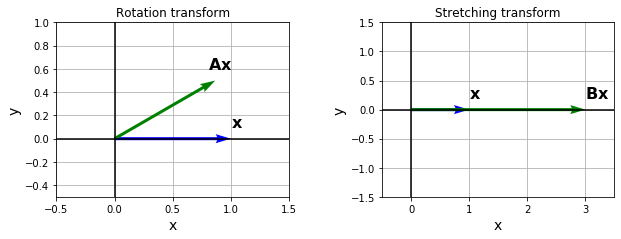

In [1]:
x = np.array([1,0]) # Original vector
theta = 30 * mt.pi / 180 # 30 degress in radian
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # Rotation matrix for theta=30 degrees
B = np.array([[3,0],[0,1]]) # Stretching matrix

Ax = A @ x  # y1 is the rotated vector
Bx = B @ x  # y2 is the stretched vector

# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])

# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])
origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[:,0], t1[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,1.5])
ax1.set_ylim([-0.5,1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[:,0], t2[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,3.5])
ax2.set_ylim([-1.5,1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

PCA

In [2]:
def pca(X):
  # Data matrix X, assumes 0-centered
  n, m = X.shape
  assert np.allclose(X.mean(axis=0), np.zeros(m))
  # Compute covariance matrix
  C = np.dot(X.T, X) / (n-1)
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
  X_pca = np.dot(X, eigen_vecs)
  return X_pca

SVD

In [3]:
def svd(X):
  # Data matrix X, X doesn't need to be 0-centered
  n, m = X.shape
  # Compute full SVD
  U, Sigma, Vh = np.linalg.svd(X, 
      full_matrices=False, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)
  # Transform X with SVD components
  X_svd = np.dot(U, np.diag(Sigma))
  return X_svd

In [7]:
X = np.array([[1,2,3],[4,2,1],[6,3,1]])
n=3

PCA and SVD

In [8]:
# Compute covariance matrix
C = np.dot(X.T, X) / (n-1)

# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)

# SVD
U, Sigma, Vh = np.linalg.svd(X, 
    full_matrices=False, 
    compute_uv=True)

# Relationship between singular values and eigen values:
print(np.allclose(np.square(Sigma) / (n - 1), eigen_vals)) # True

True
